In [ ]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Unzip the file (replace 'your_file.zip' with your uploaded file name)
!unzip /content/hpp.zip


Archive:  /content/hpp.zip
  inflating: kc_house_data.csv       


In [ ]:
# Load the dataset (replace 'kc_house_data.csv' with your actual file name)
df = pd.read_csv('kc_house_data.csv')

# Display the first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# View dataset information (column names, data types, non-null counts)
df.info()

# Summary statistics (e.g., mean, standard deviation)
df.describe()

# Check for missing values in each column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [ ]:
# Drop unnecessary columns if they exist
if 'id' in df.columns and 'date' in df.columns:
    df = df.drop(['id', 'date'], axis=1)
else:
    print("Warning: 'id' and/or 'date' columns not found in the DataFrame.")

# Rest of the code...


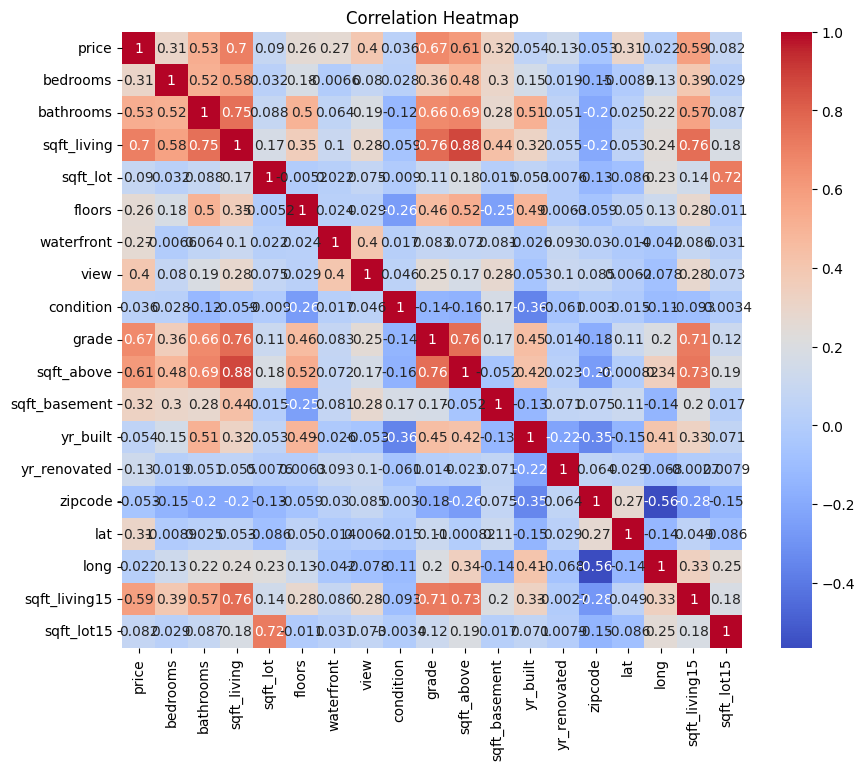

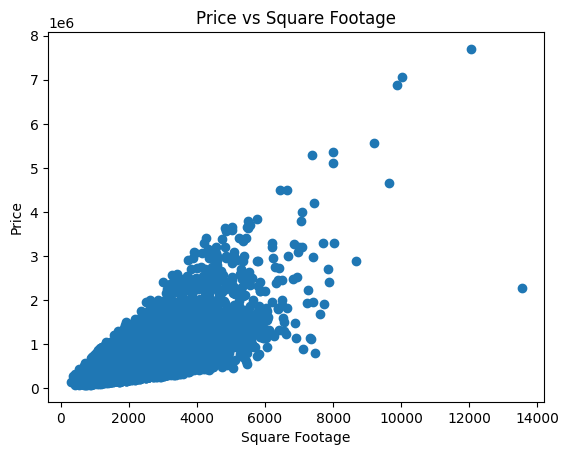

In [ ]:
# Correlation heatmap for features and price
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot between 'sqft_living' and 'price' (just an example)
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Price vs Square Footage')
plt.show()


In [ ]:
# Features (X) and target (y)
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade']]  # You can choose different features based on correlation
y = df['price']


In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predict the prices using the test data
y_pred = model.predict(X_test)

# Evaluate the model using R² (coefficient of determination) and RMSE (Root Mean Squared Error)
from sklearn.metrics import mean_squared_error, r2_score

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.5505426194978674
RMSE: 260667.39167738528


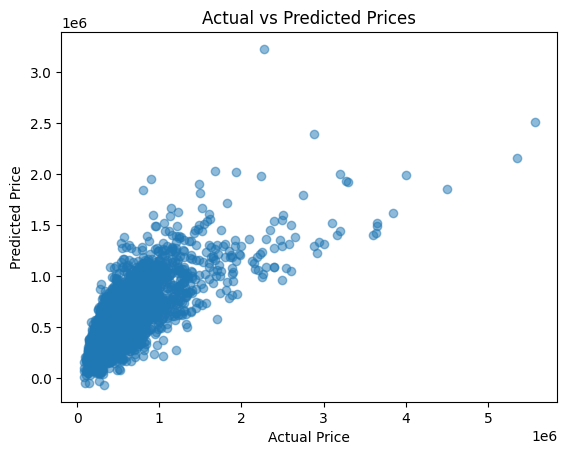

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()


In [ ]:
import pickle
import os

# Define the path where you want to save the model in Google Drive
model_path = '/content/drive/MyDrive/HousePricePrediction/house_price_model.pkl'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the trained model to Google Drive
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

In [ ]:
!ls /content


drive  hpp.zip	kc_house_data.csv  sample_data


In [ ]:
import os
import pickle

# Define the path where you want to save the model and dataset
drive_folder = '/content/drive/MyDrive/HousePricePrediction'
os.makedirs(drive_folder, exist_ok=True)

# Save the model
model_path = f'{drive_folder}/house_price_model.pkl'
with open(model_path, 'wb') as model_file:
    pickle.dump(model, model_file)

# Optionally, save your dataset as well
dataset_path = f'{drive_folder}/house_price_dataset.csv'
df.to_csv(dataset_path, index=False)


In [ ]:
# Save the dataset as a CSV file in Google Drive
dataset_path = '/content/drive/MyDrive/HousePricePrediction/house_price_dataset.csv'

# Save the dataframe to a CSV file
df.to_csv(dataset_path, index=False)
